<a href="https://www.kaggle.com/code/kamnjeng/websiteanalytics?scriptVersionId=262815616" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Data Analysis Setup

Imports all the necessary libraries for data manipulation, visualization, and machine learning.

- warnings: Used to ignore any warnings that might be generated during the execution of the code to keep the output clean.

- numpy: A fundamental library for numerical operations in Python, often used for array and matrix computations.

- pandas: The primary library for data manipulation and analysis. It is used to load and process the dataset.

- seaborn and matplotlib.pyplot: Libraries for creating statistical and other plots to visualize the data.

- sklearn: The scikit-learn library, which contains a wide range of machine learning tools. We are importing specific modules for splitting data, scaling features, and evaluating a model.

In [49]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, classification_report, accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

# 2. Suppress Warnings

- This cell is a simple but useful step to prevent the notebook output from being cluttered with warnings.

In [50]:
warnings.filterwarnings("ignore")

# 3. Load and Inspect the Data

- This cell loads the Web Analytic_Dataset.csv file into a pandas DataFrame.

- The .head() method is then used to display the first five rows of the DataFrame, which is a common practice to get a quick look at the data structure, column names, and data types.

In [51]:
df = pd.read_csv("/kaggle/input/web-analytics-dataset/Web Analytic_Dataset.csv")

df.head()

,Source / Medium,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold
0,A,2019,11,"126,870","104,020","194,667",71.59%,"455,159",00:01:11,0.2,394,"83,244",482
1,A,2020,5,"120,625","98,574","194,114",64.56%,"559,509",00:01:32,0.69,"1,347","203,552","2,402"
2,A,2019,10,"123,361","104,308","181,175",41.91%,"368,907",00:01:05,0.26,477,"94,282",599
3,A,2019,9,"106,551","88,428","170,329",75.92%,"368,803",00:01:01,0.18,311,"54,971",415
4,A,2020,6,"102,123","82,461","163,446",67.10%,"425,410",00:01:20,0.7,"1,138","167,113","1,987"


# 4. View Last Rows of the Data

- The .tail() method is the counterpart to .head() and is used here to display the last five rows of the DataFrame. This is helpful for checking the end of the dataset and ensuring it has been loaded completely without any truncation.

In [52]:
df.tail()

,Source / Medium,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold
245,AA,2020,5,111,97,131,61.07%,324,00:01:26,0,0,0,0
246,K,2020,2,112,81,130,68.46%,297,00:01:20,0,0,0,0
247,JJ,2019,12,117,90,129,29.46%,"1,000",00:05:36,0.78,1,81,1
248,K,2020,3,111,70,127,62.20%,397,00:01:27,0.79,1,77,1
249,euromessage / push,2020,5,99,1,125,60.80%,396,00:01:44,0,0,0,0


# 5. Check Column Names

- This cell uses the .columns attribute to print a list of all column names in the DataFrame. This is important for identifying any typos or unexpected spacing in the column names before starting the data cleaning and analysis process.

In [53]:
df.columns

Index(['Source / Medium', 'Year', 'Month of the year', 'Users', 'New Users',
       'Sessions', 'Bounce Rate', 'Pageviews', 'Avg. Session Duration',
       'Conversion Rate (%)', 'Transactions', 'Revenue', 'Quantity Sold'],
      dtype='object')

# 6. Get Data Dimensions

- The .shape attribute returns a tuple representing the dimensions of the DataFrame. The output (250, 13) indicates that the dataset contains 250 rows and 13 columns.

In [54]:
df.shape

(250, 13)

# 7. View Data Information and Types

- This cell provides a concise summary of the DataFrame. The .info() method shows the data types of each column and the number of non-null values. The output indicates that many columns, such as 'Users' and 'Sessions', are of type 

- **object** despite containing what appears to be numerical data, which suggests they will require data type conversion before numerical analysis can be performed.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Source / Medium        250 non-null    object
 1   Year                   250 non-null    int64 
 2   Month of the year      250 non-null    int64 
 3   Users                  250 non-null    object
 4   New Users              250 non-null    object
 5   Sessions               250 non-null    object
 6   Bounce Rate            250 non-null    object
 7   Pageviews              250 non-null    object
 8   Avg. Session Duration  250 non-null    object
 9   Conversion Rate (%)    250 non-null    object
 10  Transactions           250 non-null    object
 11  Revenue                250 non-null    object
 12  Quantity Sold          250 non-null    object
dtypes: int64(2), object(11)
memory usage: 25.5+ KB


# 8. Check for Missing Values

This cell checks for missing values (NaN) in each column of the DataFrame using .isna() and then sums them up. The output shows that there are no missing values in the dataset.

In [56]:
df.isna().sum()

Source / Medium          0
Year                     0
Month of the year        0
Users                    0
New Users                0
Sessions                 0
Bounce Rate              0
Pageviews                0
Avg. Session Duration    0
Conversion Rate (%)      0
Transactions             0
Revenue                  0
Quantity Sold            0
dtype: int64

# 9. Check for Duplicated Rows

This cell checks for any duplicated rows in the DataFrame using .duplicated() and then counts how many there are. The 

*False* count of 250 indicates that all rows are unique, meaning there are no duplicate entries in the dataset.

In [57]:
df.duplicated().value_counts()

False    250
Name: count, dtype: int64

# 10. Summary Statistics of the Data

This cell generates descriptive statistics for the entire DataFrame, including both numerical and object type columns, using describe(include="all"). This provides insights into the central tendency, dispersion, and shape of the dataset's distribution. For 

object type columns, it shows unique values and top occurring values.

In [58]:
df.describe(include="all")

,Source / Medium,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold
count,250,250.000000,250.000000,250,250,250,250,250,250,250,250,250,250
unique,38,NaN,NaN,238,223,244,240,246,163,128,104,202,123
top,A,NaN,NaN,86,83,137,0.00%,"1,188",00:03:00,0,0,0,0
freq,12,NaN,NaN,3,3,2,3,2,5,46,46,46,46
mean,NaN,2019.644000,6.540000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.479776,3.507937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2019.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2019.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2020.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 11. Visualize Data Distribution

This cell uses seaborn and matplotlib to create a histogram of Sessions, pageviews and bounce rate, scatterplot of pageviews vs sessions and finally lineplot for the trend. This visualizations is useful for understanding the distribution of sales quantities for different traffic sources and for identifying any potential outliers.

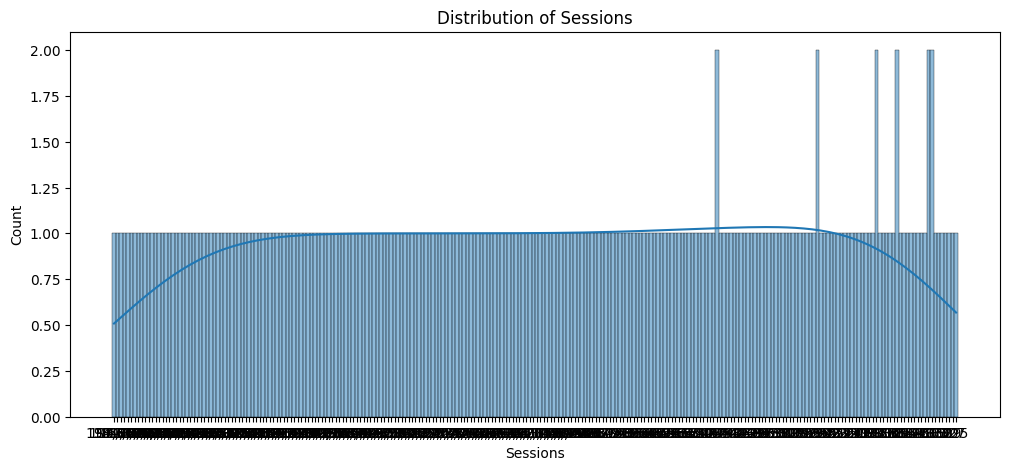

In [59]:
# Distribution of sessions, pageviews
plt.figure(figsize=(12,5))
sn.histplot(df["Sessions"], bins=30, kde=True)
plt.title("Distribution of Sessions")

plt.show()

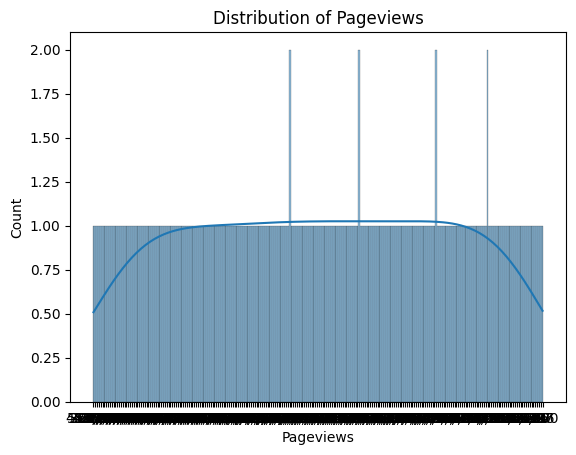

In [60]:
sn.histplot(df["Pageviews"], bins=30, kde=True)
plt.title("Distribution of Pageviews")

plt.show()

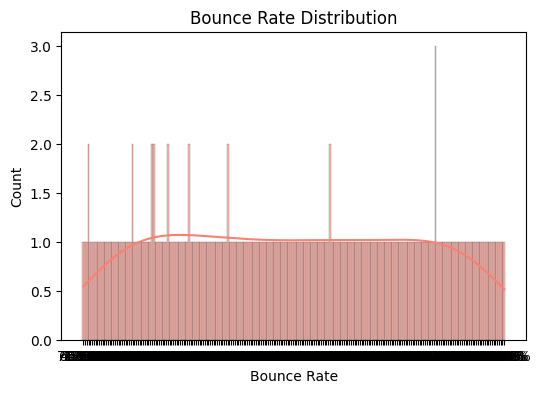

In [61]:
# Bounce Rate distribution
plt.figure(figsize=(6,4))
sn.histplot(df["Bounce Rate"], bins=30, kde=True, color="salmon")
plt.title("Bounce Rate Distribution")

plt.show()

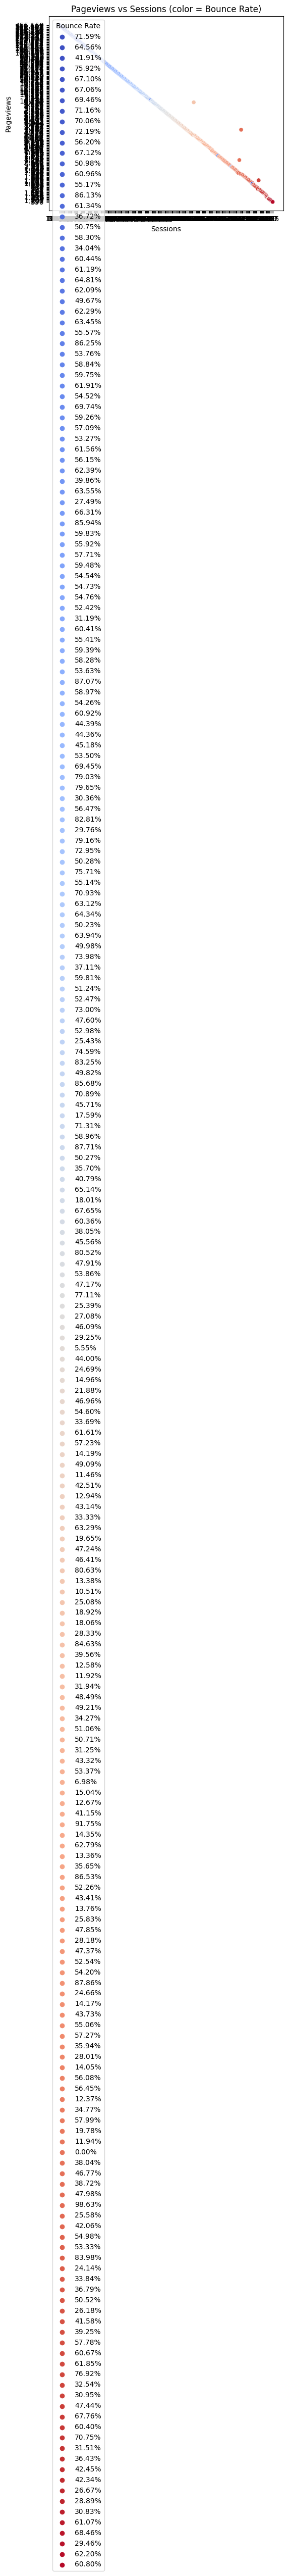

In [62]:
# Relationship: Session vs Pageviews
plt.figure(figsize=(6,5))
sn.scatterplot(data=df, x="Sessions", y="Pageviews", hue="Bounce Rate", palette="coolwarm")
plt.title("Pageviews vs Sessions (color = Bounce Rate)")

plt.show()

In [63]:
df.columns

Index(['Source / Medium', 'Year', 'Month of the year', 'Users', 'New Users',
       'Sessions', 'Bounce Rate', 'Pageviews', 'Avg. Session Duration',
       'Conversion Rate (%)', 'Transactions', 'Revenue', 'Quantity Sold'],
      dtype='object')

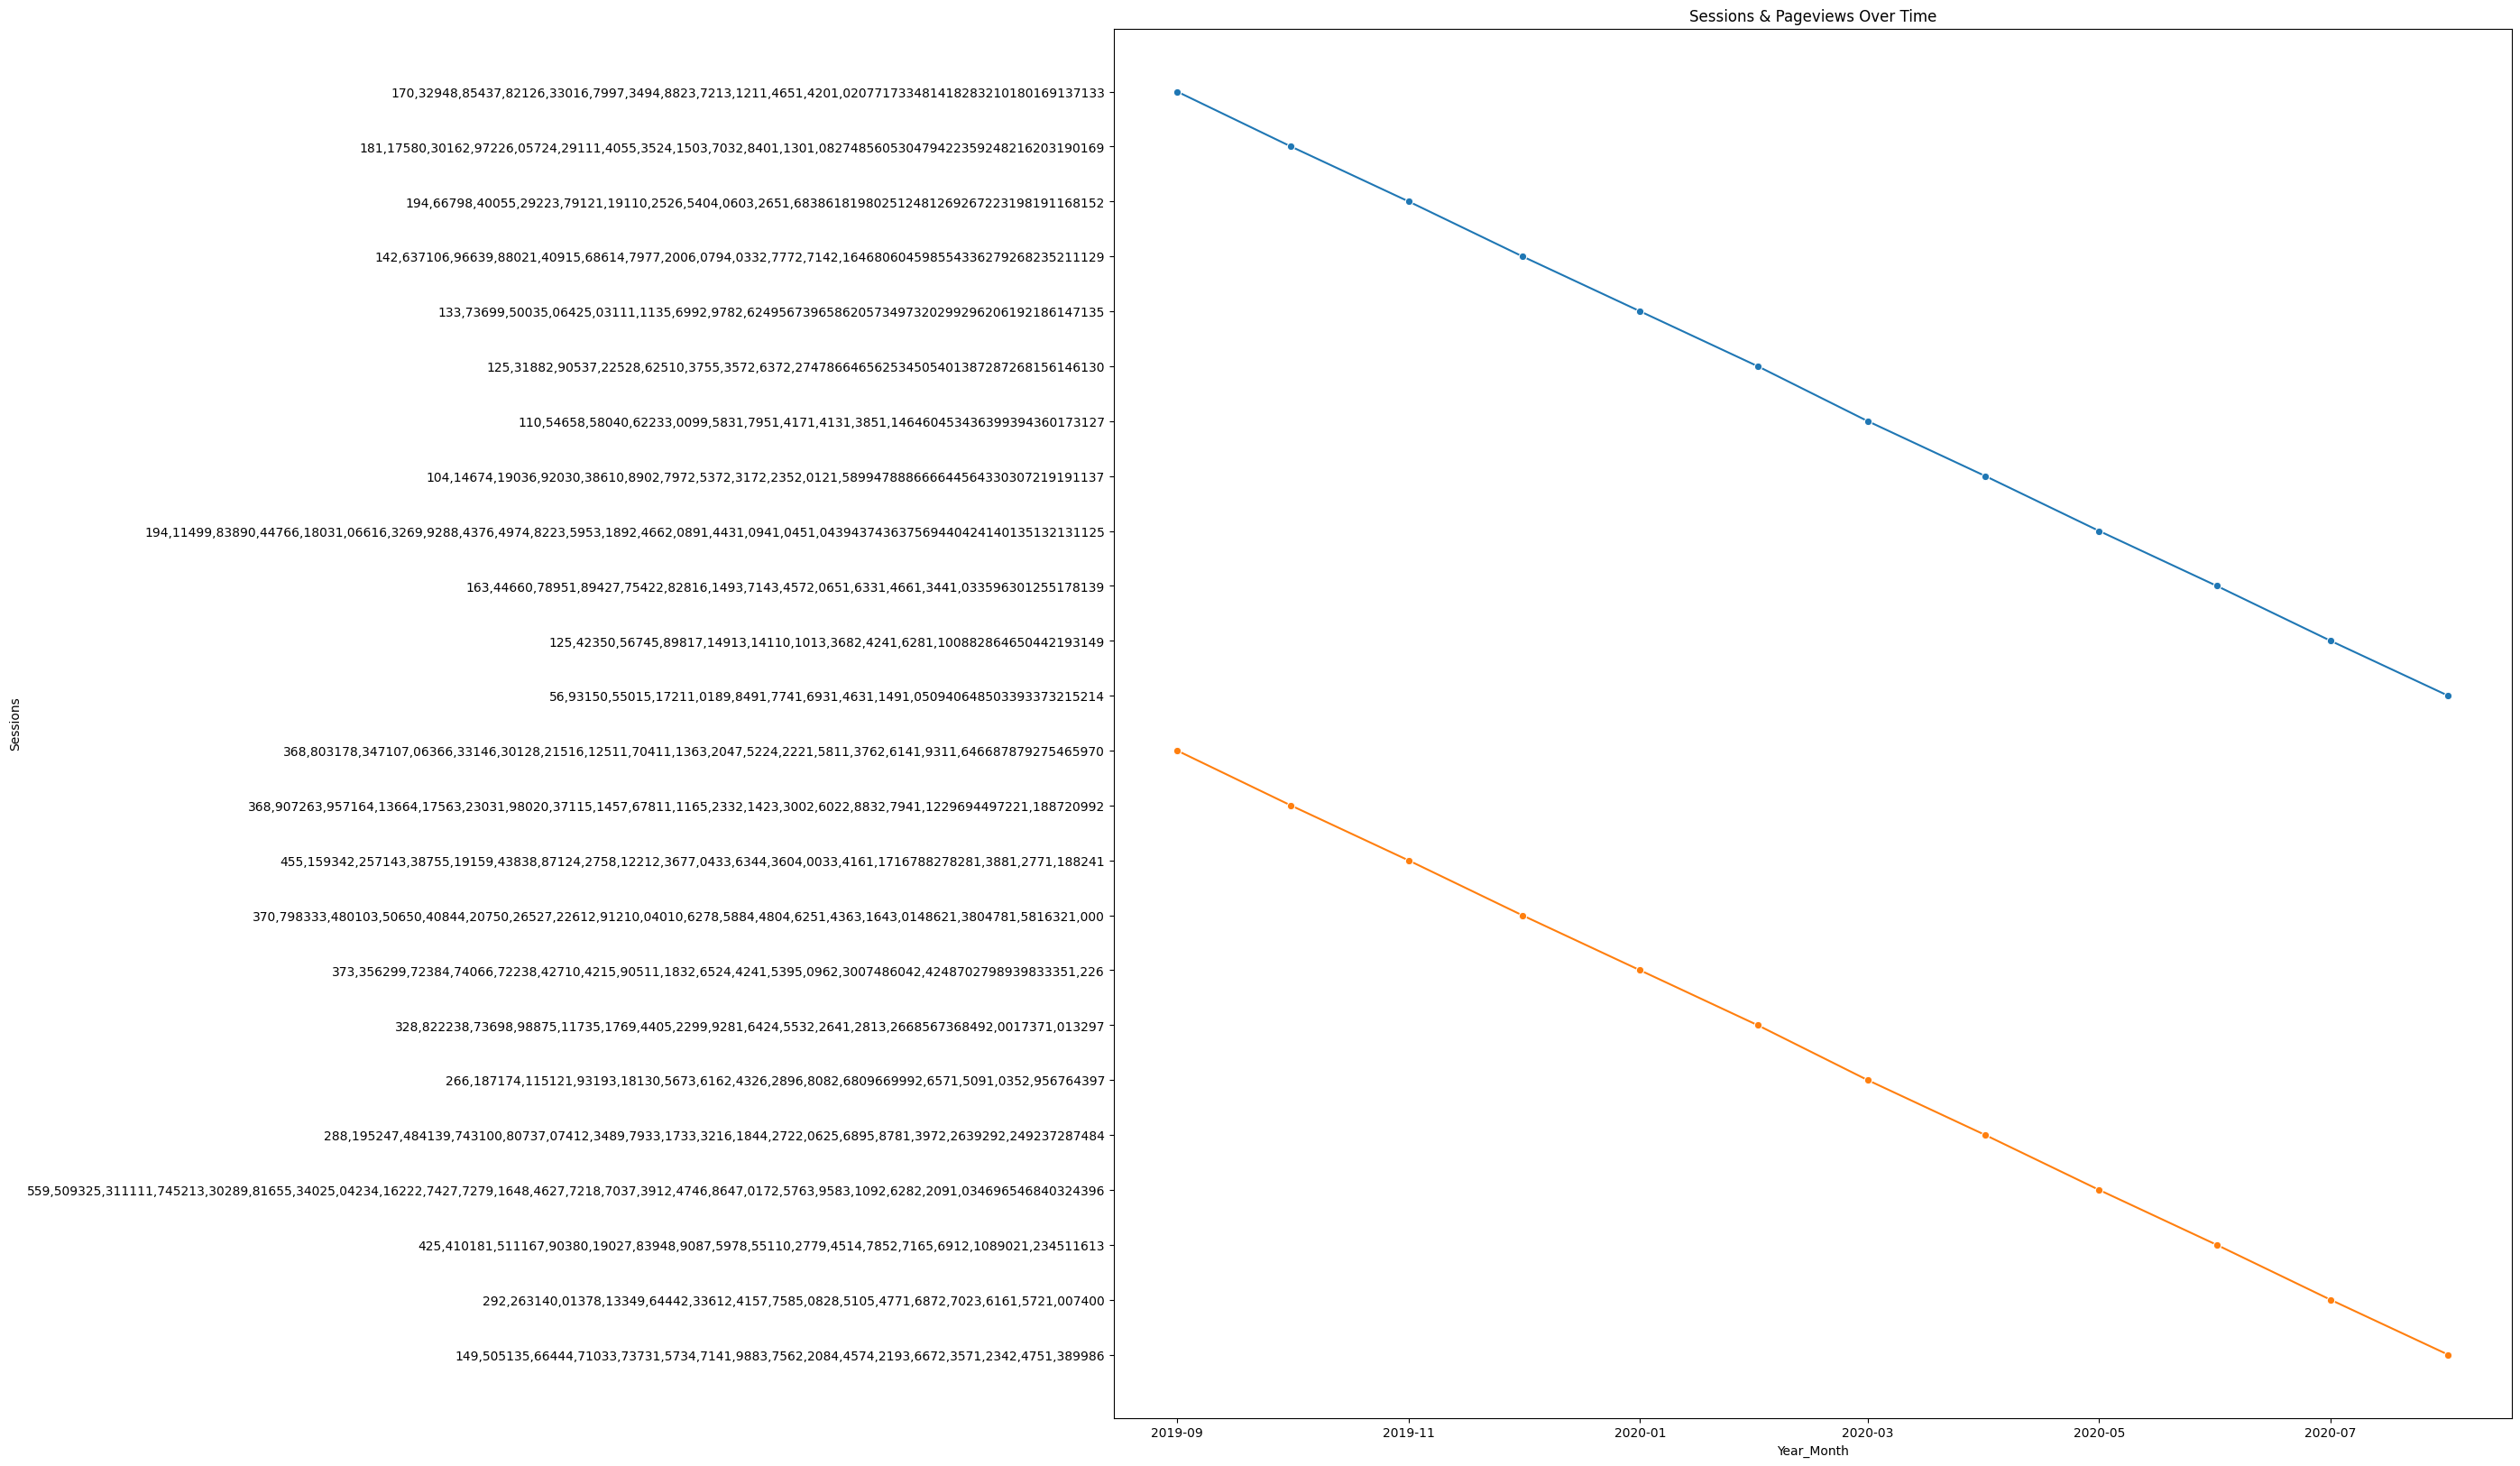

In [64]:
# Trend over time if Year & Month present
if "Year" in df.columns and "Month of the year" in df.columns:
    df["Year_Month"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month of the year"].astype(str) + "-01")
    monthly = df.groupby("Year_Month").agg({
        "Sessions":"sum",
        "Users":"sum",
        "Pageviews":"sum"
    }).reset_index()
    plt.figure(figsize=(20,20))
    sn.lineplot(data=monthly, x="Year_Month", y="Sessions", marker="o")
    sn.lineplot(data=monthly, x="Year_Month", y="Pageviews", marker="o")
    plt.title("Sessions & Pageviews Over Time")
    
    plt.show()

In [65]:
# 3) Cleaning & Feature Engineering

df_copy = df.copy()

In [66]:
# Handle missing values
df_copy = df_copy.dropna(subset=["Bounce Rate", "Sessions", "Pageviews"])  # or fill

# Maybe convert bounce rate string percentages to float (if formatted like "50%")
def parse_bounce(x):
    if isinstance(x, str) and "%" in x:
        return float(x.strip().replace("%","")) / 100.0
    try:
        return float(x)
    except:
        return np.nan

In [67]:
# Ensure numeric conversion for critical columns
for col in ["Pageviews", "Sessions", "New Users", "Users"]:
    if col in df_copy.columns:
        df_copy[col] = (
            df_copy[col]
            .astype(str)                # force to string
            .str.replace(",", "")        # remove commas (like "1,234")
            .str.replace("%", "")        # remove percentages if present
        )
        df_copy[col] = pd.to_numeric(df_copy[col], errors="coerce")

# Feature Bounce Rate
df_copy["bounce_rate"] = df_copy["Bounce Rate"].apply(parse_bounce)
# Feature: pageviews per session
df_copy["pv_per_session"] = df_copy["Pageviews"] / df_copy["Sessions"].replace(0, np.nan)

# Feature: new user ratio
if "New Users" in df_copy.columns and "Users" in df_copy.columns:
    df_copy["new_user_ratio"] = df_copy["New Users"] / df_copy["Users"].replace(0, np.nan)

# PROBLEM 1 CLASSIFICATION
High_bounce vs Low_bounce

In [68]:
# Target: classify "high bounce" vs "low bounce"
# Define threshold, e.g., bounce_rate > 0.5 as high bounce
df2 = df_copy.dropna(subset=["bounce_rate"])
df2["high_bounce"] = (df2["bounce_rate"] > 0.5).astype(int)

In [69]:
# Select features
feature_cols = ["Sessions", "Pageviews", "pv_per_session"]
if "new_user_ratio" in df2.columns:
    feature_cols.append("new_user_ratio")

In [70]:
# Clean up
df_model = df2[feature_cols + ["high_bounce"]].dropna()

# Split
X = df_model[feature_cols]
y = df_model["high_bounce"]

In [71]:
# split the dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [72]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Modelling
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
clf.fit(X_train_scaled, y_train)
y_pred1 = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)[:,1]

In [74]:
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.86      0.86      0.86        28

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



In [75]:
# Convert bounce rate from string percentages to numeric
if df2["Bounce Rate"].dtype == "object":
    df2["Bounce Rate"] = (
        df2["Bounce Rate"]
        .str.replace("%","", regex=True)   # remove % sign
        .astype(float)                     # convert to float
    )
    
# Define high bounce if bounce rate > 0.5
df2["high_bounce"] = (df2["Bounce Rate"] > 50).astype(int)  # if bounce rate is in %
# OR
df2["high_bounce"] = (df2["Bounce Rate"] > 0.5).astype(int)  # if bounce rate is in [0,1]


In [76]:
auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {auc:.3f}")
print("Classification Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification F1:", f1_score(y_test, y_pred1))

ROC-AUC: 0.916
Classification Accuracy: 0.84
Classification F1: 0.8571428571428571


In [77]:
classification_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred1),
    "F1": f1_score(y_test, y_pred1),
    "ROC-AUC": roc_auc_score(y_test, y_pred1)
}

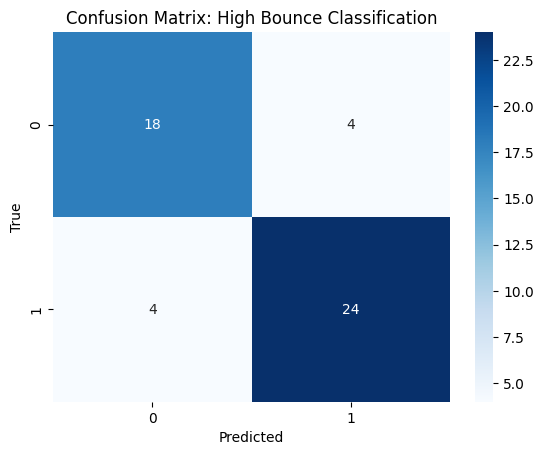

In [78]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred1)
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: High Bounce Classification")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

Top sources by bounce rate:
  Source / Medium  Bounce Rate  Sessions      Pageviews
0              GG    98.630000       219     237.000000
1               D    86.020000    127386   31432.000000
2               N    84.245000      7057    5524.000000
3               L    74.911250     24629    6086.875000
4               O    74.585000     10882    6012.750000
5               A    66.911667   1702468  353909.500000
6              BB    65.053333      1133     688.666667
7               H    62.474000     97793   47276.800000
8               M    62.073333     23186    7065.083333
9               P    61.752727     25187    5215.909091


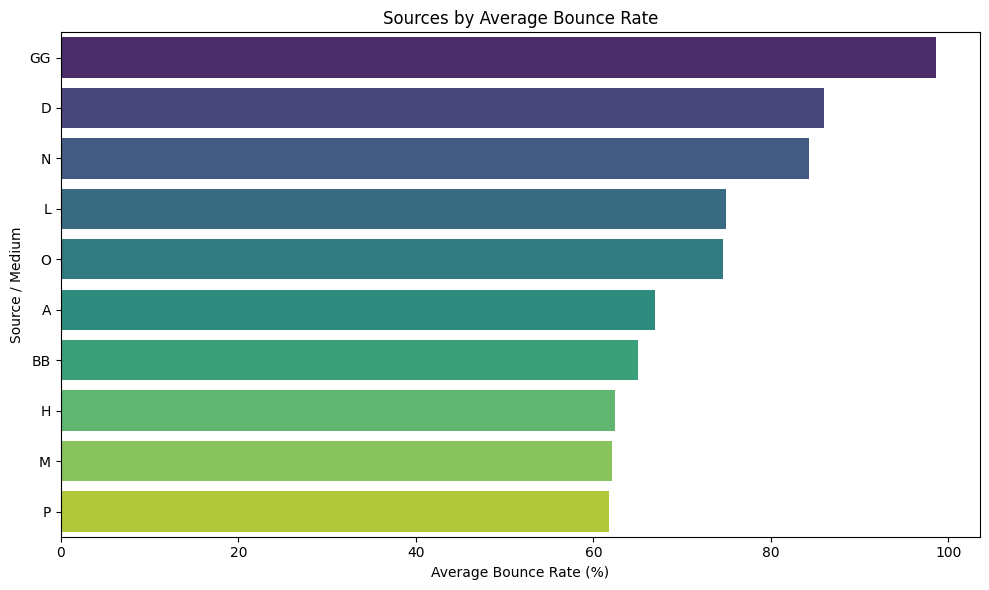

In [79]:
# Check if the 'Source / Medium' column exists in the dataframe
# Insights & Reporting
# Which sources/mediums have highest average bounce?
if "Source / Medium" in df2.columns:
    # Group by 'Source / Medium' to get the average bounce rate and other metrics
    source_stats = df2.groupby("Source / Medium").agg({
        "Bounce Rate": "mean",  # Corrected to 'Bounce_Rate' after data cleaning
        "Sessions": "sum",
        "Pageviews": "mean" # Assumed 'pv_per_session' meant Pageviews per session
    }).sort_values(by="Bounce Rate", ascending=False).reset_index().head(10)
    
    print("Top sources by bounce rate:")
    print(source_stats)

    # Plot the results using a bar plot
    plt.figure(figsize=(10, 6)) # Add a figure size for better display
    sn.barplot(data=source_stats, x="Bounce Rate", y="Source / Medium", palette="viridis")
    plt.title("Sources by Average Bounce Rate")
    plt.xlabel("Average Bounce Rate (%)")
    plt.ylabel("Source / Medium")
    plt.tight_layout() # Adjust plot to ensure all labels are visible
    plt.show()

else:
    print("The 'Source / Medium' column does not exist in the DataFrame.")

Feature importances:
pv_per_session    0.393078
Sessions          0.236225
new_user_ratio    0.189287
Pageviews         0.181409
dtype: float64


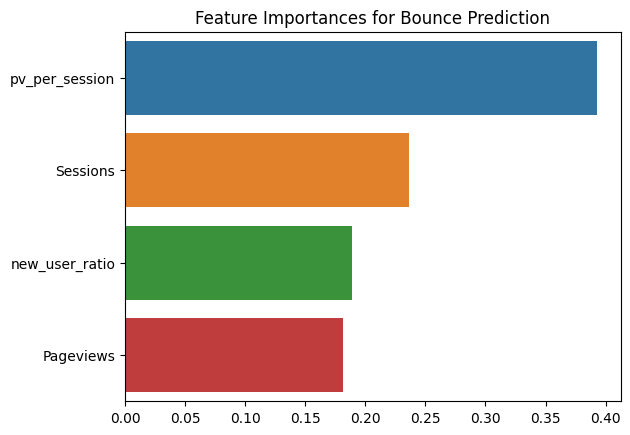

In [80]:
# feature importance
importances = clf.feature_importances_
feat_imp = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
print("Feature importances:")
print(feat_imp)

sn.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importances for Bounce Prediction")

plt.show()

# PROBLEM 2 REGRESSION
- Predict bounce_rate as continuous 

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [82]:
# Regression Task
# Predict Bounce Rate as continuous

feature_cols = ["Sessions", "Pageviews", "pv_per_session"]
if "new_user_ratio" in df_copy.columns:
    feature_cols.append("new_user_ratio")

In [83]:
for col in df_copy.columns:
        if col in df_copy.columns:
            df_copy[col] = (
                df_copy[col]
                .astype(str)                          # ensure string
                .str.replace(",", "", regex=False)     # remove thousands separator
                .str.replace("%", "", regex=False)     # remove percent signs
                .str.strip()                           # trim spaces
            )
            df_copy[col] = pd.to_numeric(df_copy[col], errors="coerce")

In [84]:
X = df_copy[feature_cols].fillna(0)
y = df_copy["Bounce Rate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Define a regression model
reg = RandomForestRegressor(n_estimators=200, random_state=42)
reg.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [87]:
# Perform prediction on the test set
y_pred = reg.predict(X_test_scaled)

print("📈 Regression Results")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

📈 Regression Results
MSE: 146.7190920033001
R²: 0.6082258809055822


In [88]:
regression_metrics = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
}

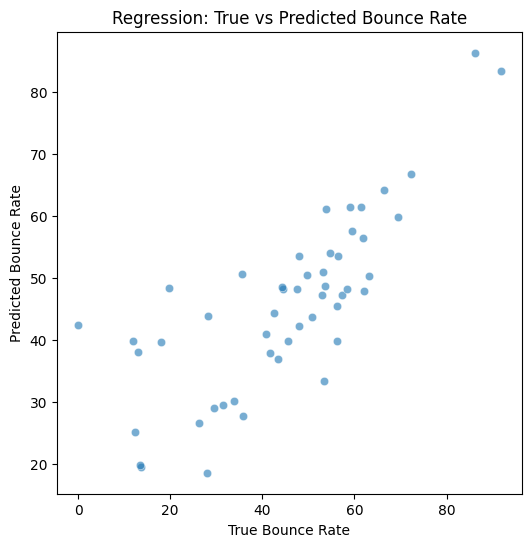

In [89]:
# Plot predictions
plt.figure(figsize=(6,6))
sn.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("True Bounce Rate")
plt.ylabel("Predicted Bounce Rate")
plt.title("Regression: True vs Predicted Bounce Rate")

plt.show()

In [90]:
df_copy.head()

,Source / Medium,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold,Year_Month,bounce_rate,pv_per_session,new_user_ratio
0,NaN,2019,11,126870,104020,194667,71.59,455159,NaN,0.20,394,83244,482,NaN,0.7159,2.338142,0.819894
1,NaN,2020,5,120625,98574,194114,64.56,559509,NaN,0.69,1347,203552,2402,NaN,0.6456,2.882373,0.817194
2,NaN,2019,10,123361,104308,181175,41.91,368907,NaN,0.26,477,94282,599,NaN,0.4191,2.036192,0.845551
3,NaN,2019,9,106551,88428,170329,75.92,368803,NaN,0.18,311,54971,415,NaN,0.7592,2.165239,0.829912
4,NaN,2020,6,102123,82461,163446,67.10,425410,NaN,0.70,1138,167113,1987,NaN,0.6710,2.602756,0.807467


In [91]:
# Restore "Source / Medium" column from raw df
if "Source / Medium" in df.columns:
    df_copy["Source / Medium"] = df["Source / Medium"]

# PROBLEM 3 CLUSTERING.

- We will be using kmeans model and PCA for 2d visualization.

🔎 Clustered Sources_Mediums:
                      Sessions      Pageviews  Bounce Rate  pv_per_session  \
Source / Medium                                                              
A                141872.333333  353909.500000    66.911667        2.514281   
AA                  334.666667     877.888889    57.887778        2.823041   
B                 70042.666667  220070.666667    57.179167        3.153696   
BB                  377.666667     688.666667    65.053333        1.757742   
C                 30721.833333   94839.000000    51.136667        3.434672   

                 Cluster  
Source / Medium           
A                      2  
AA                     1  
B                      2  
BB                     1  
C                      1  


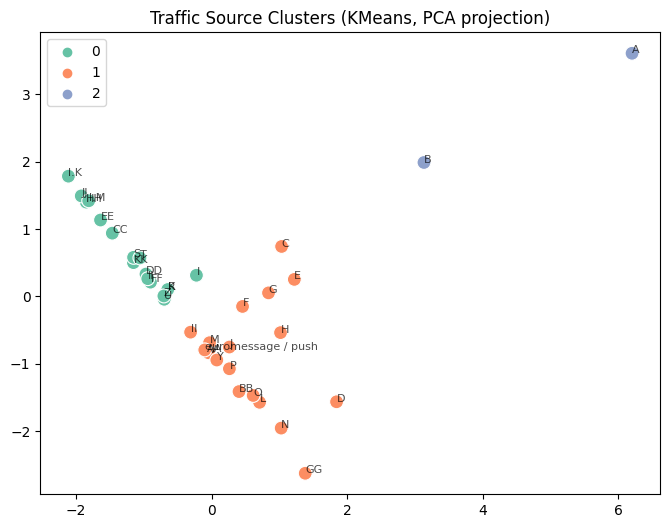

In [92]:
# Clustering Task
# Segment traffic sources/mediums
if "Source / Medium" in df_copy.columns:
    cluster_features = df_copy.groupby("Source / Medium").agg({
        "Sessions":"mean",
        "Pageviews":"mean",
        "Bounce Rate":"mean",
        "pv_per_session":"mean"
    }).fillna(0)

    # Scale
    scaler = StandardScaler()
    cluster_scaled = scaler.fit_transform(cluster_features)

    # KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(cluster_scaled)

    cluster_features["Cluster"] = cluster_labels

    print("🔎 Clustered Sources_Mediums:")
    print(cluster_features.head())

    # PCA for 2D visualization
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(cluster_scaled)

    plt.figure(figsize=(8,6))
    sn.scatterplot(x=reduced[:,0], y=reduced[:,1],
                    hue=cluster_labels, palette="Set2",
                    s=100)
    
    for i, txt in enumerate(cluster_features.index):
        plt.annotate(txt, (reduced[i,0], reduced[i,1]), fontsize=8, alpha=0.7)
    plt.title("Traffic Source Clusters (KMeans, PCA projection)")
    
    plt.show()

In [93]:
from sklearn.metrics import silhouette_score

print("Clustering Silhouette Score:", silhouette_score(cluster_scaled, cluster_labels))

Clustering Silhouette Score: 0.4654693288431323


In [94]:
clustering_metrics = {
        "n_clusters": 3,
        "inertia": kmeans.inertia_,
        "samples_clustered": len(cluster_labels),
        "Silhouette Score": silhouette_score(cluster_scaled, cluster_labels)
}

# Reporting
So we will be creating a dataframe to show each model performance using different metrics of each model

In [95]:
report = pd.DataFrame({
    "Classification": classification_metrics,
    "Regression": regression_metrics,
    "Clustering": clustering_metrics
})

In [96]:
print("\n🔎 Model Comparison Report:")
report


🔎 Model Comparison Report:


,Classification,Regression,Clustering
Accuracy,0.840000,NaN,NaN
F1,0.857143,NaN,NaN
ROC-AUC,0.837662,NaN,NaN
MAE,NaN,8.503928,NaN
RMSE,NaN,12.112766,NaN
R2,NaN,0.608226,NaN
n_clusters,NaN,NaN,3.000000
inertia,NaN,NaN,41.620329
samples_clustered,NaN,NaN,38.000000
Silhouette Score,NaN,NaN,0.465469


# 📑 Model Performance Report – Website Analytics

## 1. **Classification (High vs. Low Bounce)**

* **Accuracy:** 84%
* **F1 Score:** 85%
* **ROC-AUC:** 83%

**Findings:**
The classifier demonstrates **strong predictive ability** for distinguishing high-bounce from low-bounce sessions. The balanced F1 score suggests the model performs well across both classes. ROC-AUC confirms the model can reliably separate the two groups.
➡️ **Implication:** This approach is effective for *flagging risky traffic* and guiding interventions (e.g., optimize landing pages for high-bounce cohorts).

---

## 2. **Regression (Continuous Bounce Rate Prediction)**

* **MAE:** 8.503
* **RMSE:** 12.113
* **R²:** 0.6082

**Findings:**
The regression explains about **61% of the variance** in bounce rate. Errors (±8–12 points on average) are moderate, suggesting the model captures major trends but struggles with finer fluctuations.
➡️ **Implication:** Useful for *forecasting average bounce rate trends* over time or across channels, but not precise enough for individual-level predictions.

---

## 3. **Clustering (Source/Medium Segmentation)**

* **Clusters:** 3
* **Inertia:** 41.62
* **Samples Clustered:** 38
* **Silhouette Score:** 0.466

**Findings:**
The silhouette score (\~0.47) indicates **moderate separation** between clusters. Three clusters provide interpretable groupings of traffic sources, though boundaries are not sharply distinct.
➡️ **Implication:** Clustering is valuable for *broad traffic segmentation* (e.g., Organic vs. Paid vs. Social), but the segmentation may need refinement (more features or higher-quality data).

---

## 📌 Overall Conclusion

* **Best-performing approach:** **Classification** → consistently strong metrics, reliable for operational use.
* **Regression** → good for forecasting but less precise, better suited to aggregate-level reporting.
* **Clustering** → offers exploratory segmentation, useful for strategy but less rigorous for prediction.

**Recommendation:**

* Use **Classification** for **real-time bounce risk detection**.
* Deploy **Regression** in **trend dashboards** for leadership reporting.
* Apply **Clustering** to **inform marketing mix strategies** and audience targeting.

---
